<a href="https://colab.research.google.com/github/pabloesteban2712/neuronal_mnist/blob/main/neuronal_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importamos las bibliotecas necesarias

In [22]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.datasets import mnist

In [23]:
# Cargar datasets
# MNIST contiene Imagenes de 0 a 9
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [24]:
# Los datos de pixeles tienen un rango de 0 a 255
# vamos a normalizarlos para que esten en un rango de 0 a 1

x_train = x_train / 255.0
x_test = x_test / 255.0

print("Datos normalizados!")

Datos normalizados!


In [30]:
# Modelo y configuración

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])
print("Modelo de red neuronal creado correctamente.")

Modelo de red neuronal creado correctamente.


In [31]:
# Compilar el código

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

print("Modelo compilado de forma correcta.")

Modelo compilado de forma correcta.


In [32]:
# Entrenamos el modelo (epoch = "Vueltas" al dataset)
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8792 - loss: 0.4325
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9620 - loss: 0.1270
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9759 - loss: 0.0779
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9833 - loss: 0.0570
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9862 - loss: 0.0431


In [28]:
# Evaluar el modelo
# Evaluamos el modelo con los datos de prueba (es decir, con los que NO ha sido entrenado)
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Precisión en el conjunto de pruebas: {test_accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 5.6333
Precisión en el conjunto de pruebas: 0.00


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Visualizando predicciones...


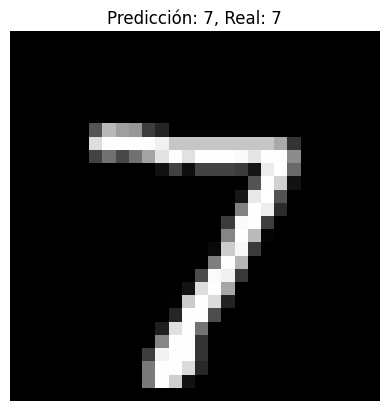

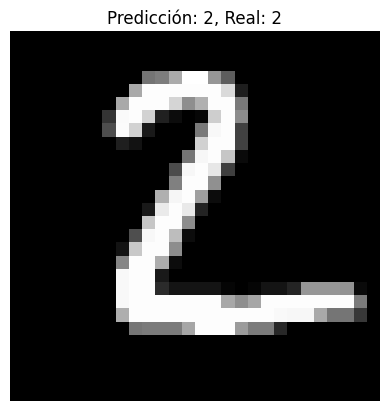

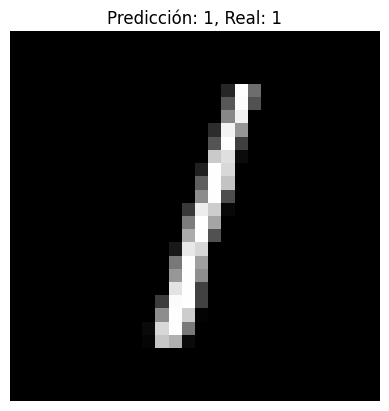

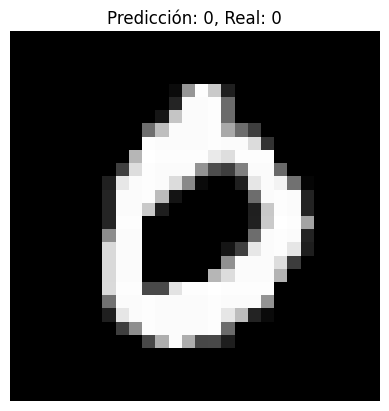

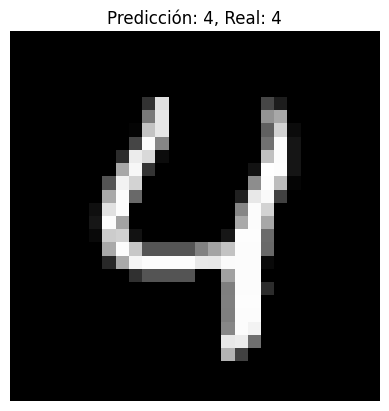

In [33]:
import matplotlib.pyplot as plt

predicciones = model.predict(x_test[:5])
clases_predichas = predicciones.argmax(axis=1)

import matplotlib.pyplot as plt

predicciones = model.predict(x_test[:5])
clases_predichas = predicciones.argmax(axis=1)

print("Visualizando predicciones...")
for i in range(5):
  plt.imshow(x_test[i], cmap="gray") # Mostrar imagen
  plt.title(f"Predicción: {clases_predichas[i]}, Real: {y_test[i]}")
  plt.axis("off")


print("Visualizando predicciones...")
for i in range(5):
  plt.imshow(x_test[i], cmap="gray") # Mostrar imagen
  plt.title(f"Predicción: {clases_predichas[i]}, Real: {y_test[i]}")
  plt.axis("off")
  plt.show()